In [1]:
#Import relevant libraries
import pandas as pd
import numpy as np
import os
import shutil

from datetime import datetime
from astropy.time import Time

import math
import statistics

import matplotlib.pyplot as plt
SMALL_SIZE = 11
MEDIUM_SIZE = 13
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [2]:
# def filter_ecsv_files_less_than_r_0_5(directory, output_directory, radius_threshold=0.5):
#     '''
#     This function will filter the ECSV files of sources with a radius greater than the given threshold and move them to a new folder.
#     '''
#     if not os.path.exists(output_directory):
#         os.makedirs(output_directory)
    
#     ecsv_files = [file for file in os.listdir(directory) if file.endswith('.ecsv')]
    
#     for ecsv_file in ecsv_files:
#         source_id = ecsv_file.split('-')[0].replace('src', 'lc')
        
#         # Check if corresponding PNG file exists with the radius information
#         png_files = [filename for filename in os.listdir(directory) if filename.startswith(source_id) and filename.endswith('.png')]
        
#         if not png_files:
#             continue
        
#         for filename in png_files:
#             radius_str = filename.split('r')[-1].split('d')[0]
#             radius = float(radius_str)
            
#             if radius <= radius_threshold:
#                 src_path = os.path.join(directory, ecsv_file)
#                 dst_path = os.path.join(output_directory, ecsv_file)
#                 shutil.copy(src_path, dst_path)
#                 print(f"Copied {src_path} to {dst_path}")
#                 break  # Assuming you want to move the ECSV file once based on any matching PNG file

# # Example usage
# directory = '/home/elizabeth/Desktop/Thesis/Variability_Analysis/Sources/J2828_UHF/4s/src-chunk00000/'
# output_directory = '/home/elizabeth/Desktop/Thesis/Variability_Analysis/Sources/J2828_UHF/4s/less_than_0.5/'

# filter_ecsv_files_less_than_r_0_5(directory, output_directory)


In [3]:
#A function that extracts ecsv files from the src00000 folder and appends them into a list
def list_ecsv_files(directory):
    '''
    This function will extract all the files with a specific extension(in this case ecsv) and send the filenames to a list.
    '''
    ecsv_file_list = []
    path = directory
    for filename in os.listdir(directory):
        if filename.endswith('.ecsv') and os.path.isfile(os.path.join(directory, filename)):
            ecsv_file_list.append(path+filename)
    return ecsv_file_list

In [4]:
#get a list of ecsv filenames (with their directory paths) using read ecsv files in a folder function
ecsv_file_list = list_ecsv_files('/home/elizabeth/Desktop/Thesis/Variability_Analysis/Sources/J2828_UHF/4s/less_than_0.5/')
ecsv_file_list.sort()
print(f'Total files = {len(ecsv_file_list)}')
file_to_investigate = int(input('Enter the file no of interest: '))
print(f'Will investigate file {ecsv_file_list[file_to_investigate]}')
#ecsv_file_list = ecsv_file_list[0:5]

Total files = 8
Enter the file no of interest: 0
Will investigate file /home/elizabeth/Desktop/Thesis/Variability_Analysis/Sources/J2828_UHF/4s/less_than_0.5/src000000-L2.ecsv


In [5]:
#Read ecsv file using pandas = df from ecsv file list
def read_csv(ecsv_filename):
    df = pd.read_csv(ecsv_filename, delim_whitespace=True, comment='#')
    return df

# Flux Distribution

Extracted flux data: {'src000000': 4.37247732774449, 'src000005': 0.21938408488763, 'src000011': 0.08633988246101, 'src000013': 0.07509237877522, 'src000015': 0.06905622871841, 'src000018': 0.05261527018933, 'src000024': 0.04359626323022, 'src000027': 0.03765674753728}


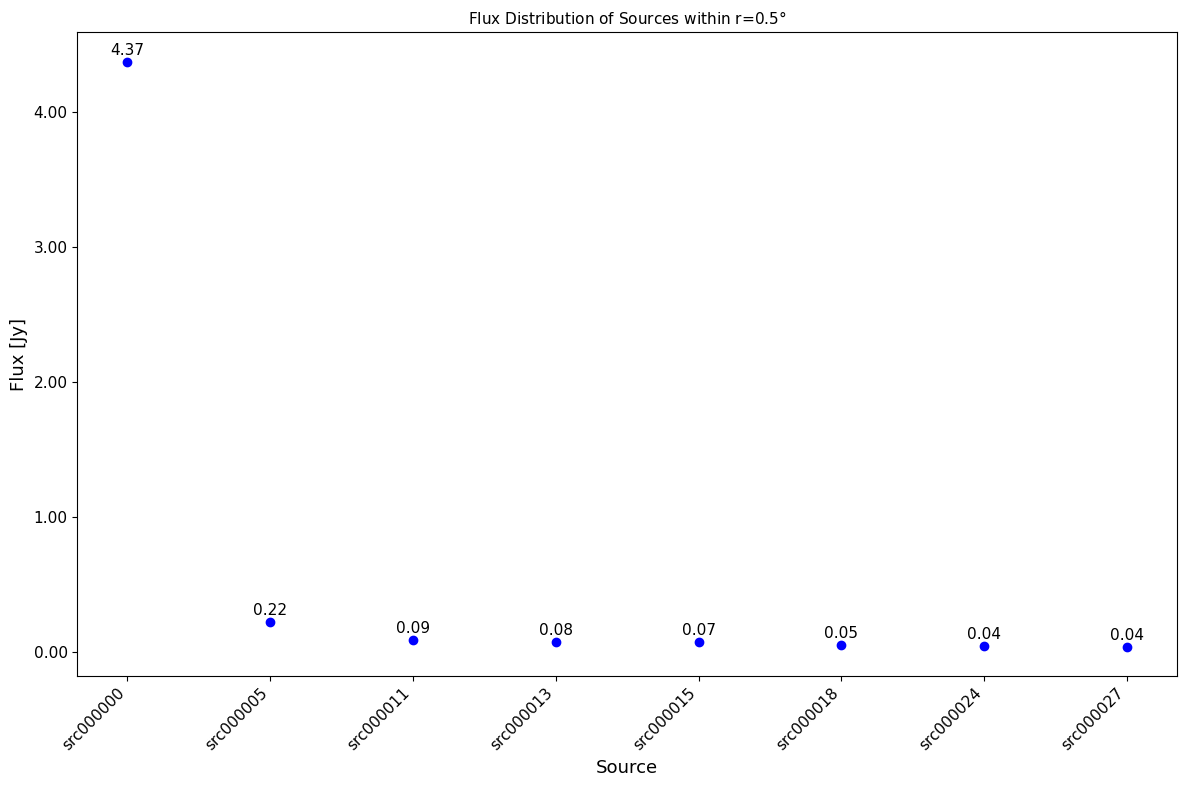

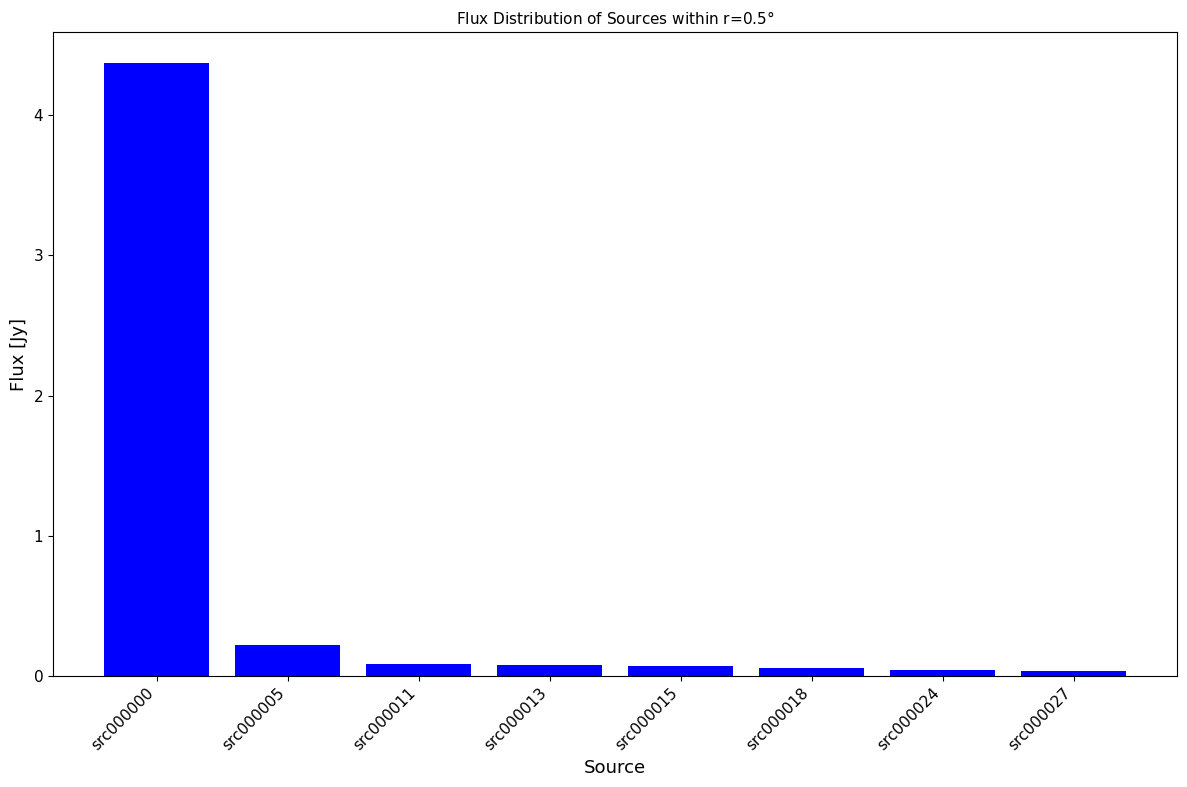

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.io import ascii

# Function to read the flux value from the header of an ECSV file using astropy
def read_ecsv_flux_from_header(ecsv_filename):
    try:
        # Read the ECSV file using astropy.io.ascii
        table = ascii.read(ecsv_filename)
        # Extract flux value from metadata
        flux_value = table.meta.get('flux')
        if flux_value is not None:
            return float(flux_value)
        else:
            print(f"Warning: Flux value not found in file {ecsv_filename}")
            return None
    except Exception as e:
        print(f"Warning: Could not read file {ecsv_filename}. Error: {e}")
        return None


# Dictionary to store source names and their corresponding flux values
flux_data = {}

# Loop through the list and extract flux values and source names from each file
for filename in ecsv_file_list:
    flux = read_ecsv_flux_from_header(filename)
    if flux is not None:
        # Extract source name from the filename
        source_name = filename.split('/')[-1].split('-L')[0]
        flux_data[source_name] = flux

# Check the extracted flux data
print("Extracted flux data:", flux_data)

# Prepare data for plotting
sources = list(flux_data.keys())
fluxes = list(flux_data.values())

# Create a scatter plot of the flux values
plt.figure(figsize=(12, 8))
plt.scatter(sources, fluxes, color='blue', marker='o')

# Annotate each point with the flux value to two decimal places
for i, txt in enumerate(fluxes):
    plt.annotate(f'{txt:.2f}', (sources[i], fluxes[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Customize plot
plt.xlabel('Source')
plt.ylabel('Flux [Jy]')
plt.title('Flux Distribution of Sources within r=$0.5\degree$')

# Format y-axis to two decimal places
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Create a histogram of the flux values
plt.figure(figsize=(12, 8))
plt.bar(sources, fluxes, color='blue')
plt.xlabel('Source')
plt.ylabel('Flux [Jy]')
plt.title('Flux Distribution of Sources within r=$0.5\degree$')

# Format y-axis to two decimal places
# plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Show the plot
plt.show()


In [7]:
# Assuming flux_data is already populated from your existing code
if flux_data:
    source_count = len(flux_data)
    min_flux = min(flux_data.values())
    max_flux = max(flux_data.values())

    print("\nSummary for Sources within r=0.5 (4s) degrees:")
    print(f"Total Source Count: {source_count}")
    print(f"Flux Range: {max_flux:.4f} Jy - {min_flux:.4f} Jy")
else:
    print("\nNo flux data found. Please check your file paths and data extraction.")


Summary for Sources within r=0.5 (4s) degrees:
Total Source Count: 8
Flux Range: 4.3725 Jy - 0.0377 Jy


# Calculate med time, VI and MI

In [8]:
def data_per_scan(df):
    '''
    This function takes a DataFrame containing time series data with NaNs and
    extracts contiguous blocks of data (scans) into a list of DataFrames.
    '''
    scans = []
    current_scan = []

    for _, row in df.iterrows():
        if pd.isna(row).any():
            if current_scan:
                scans.append(pd.DataFrame(current_scan))
                current_scan = []
        else:
            current_scan.append(row)

    if current_scan:
        scans.append(pd.DataFrame(current_scan))

    return scans

In [9]:
#Get median date and time
from datetime import datetime
from astropy.time import Time

def calculate_median_time(Scan):
    #Get the median date of a scan
    
    Scan['time']= pd.to_datetime(Scan['time'])
    
    sorted_df = sorted(Scan['time'].tolist())
    med_date = sorted_df[len(sorted_df) // 2] 
    
    return med_date

In [10]:
#Get MJD
def calculate_mjd(Scan):   
    #convert_to_julian date
    med_date = calculate_median_time(Scan)
    julian_date = Time(med_date).jd
    #convert to mjd
    mjd = julian_date - 2400000.5

    return  mjd

In [11]:
#Caculate VI and error on VI

def calculate_VI_VI_err(Scan):
    
    #Get the time 
    #time_stamp = calculate_mjd (Scan)
    
    #Get the max and min of  flux columns
    S_maximum = Scan['flux'].max()
    S_minimum = Scan['flux'].min()
    
    #Get the max and min of  flux columns errors

    S_maximum_err = Scan['flux_err'].values[Scan['flux'].argmax()]
    S_minimum_err = Scan['flux_err'].values[Scan['flux'].argmin()]
    #S_maximum_err = Scan['flux_err'].max()
    #S_minimum_err = Scan['flux_err'].min()
    
    X = (S_maximum) - (S_minimum)
    Y = (S_maximum) + (S_minimum)
    
    #A metric to quantify/study variability
    VI = ( (X) / (Y) )
    
   # print(S_maximum, S_minimum, VI)
    
    #deltas X and Y (errors)
    delta_X = ((S_maximum_err) + (S_minimum_err))
    delta_Y = ((S_maximum_err) + (S_minimum_err))
    
    
    #delta_X/X and delta_Y/Y
    delta_X_X = ((delta_X ) / (X))
    delta_Y_Y = ((delta_Y) /  (Y))
    
    #Get the error on VI
    delta_VI = (((delta_X_X) + (delta_Y_Y)) * VI)
    
    return VI, delta_VI

In [12]:
#Calculate the modulation index
def calculate_MI(Scan):
    # Calculate the sum of the flux densities
    S = Scan['flux']
    total_S = sum(S) 
    
    #Calculate the mean by dividing the total by the number of flux densities
    mean_S = total_S / len(S)

    #Calculate_std_dev of (S)
    std_dev = statistics.stdev(S)
    
    #Calculate the MI
    MI = ((std_dev) / (mean_S))
    
    return MI

# Test

In [13]:
# scan indices - run once!
path = '/home/elizabeth/Desktop/Thesis/Variability_Analysis/Sources/J2828_UHF/4s/src-chunk00000/src000000-L2.ecsv'
src0_df = read_csv(path)
scans = data_per_scan(src0_df)
scans

/tmp/ipykernel_23916/239720852.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(ecsv_filename, delim_whitespace=True, comment='#')


[                       time      flux  flux_err
 0   2022-09-30T18:20:19.400 -0.000881  0.000722
 1   2022-09-30T18:20:23.394 -0.000523  0.000548
 2   2022-09-30T18:20:27.388  0.021315  0.000730
 3   2022-09-30T18:20:31.382  0.029705  0.000885
 4   2022-09-30T18:20:35.375  0.031076  0.000874
 5   2022-09-30T18:20:39.369  0.022511  0.000729
 6   2022-09-30T18:20:43.363  0.029957  0.000871
 7   2022-09-30T18:20:47.357  0.020788  0.000715
 8   2022-09-30T18:20:51.351  0.026604  0.000840
 9   2022-09-30T18:20:55.345  0.020653  0.000751
 10  2022-09-30T18:20:59.339  0.009688  0.000560
 11  2022-09-30T18:21:03.332  0.013130  0.000579
 12  2022-09-30T18:21:07.326  0.025392  0.000788
 13  2022-09-30T18:21:11.320  0.033611  0.000971
 14  2022-09-30T18:21:15.314  0.026709  0.000833
 15  2022-09-30T18:21:19.308  0.023150  0.000773
 16  2022-09-30T18:21:23.302  0.033013  0.001017
 17  2022-09-30T18:21:27.296  0.037780  0.001026
 18  2022-09-30T18:21:31.290  0.035916  0.001043
 19  2022-09-30T18:2

In [14]:
scans[10]

,time,flux,flux_err
4614,2022-09-30T23:27:27.084,-0.008026,0.000744
4615,2022-09-30T23:27:31.078,-0.005769,0.000739
4616,2022-09-30T23:27:35.072,0.021158,0.001069
4617,2022-09-30T23:27:39.066,0.005903,0.000823
4618,2022-09-30T23:27:43.060,0.012004,0.000856
4619,2022-09-30T23:27:47.054,-0.009903,0.000692
4620,2022-09-30T23:27:51.048,-0.013019,0.000733
4621,2022-09-30T23:27:55.041,0.027129,0.001267
4622,2022-09-30T23:27:59.035,0.014502,0.000907
4623,2022-09-30T23:28:03.029,0.002244,0.000712


In [15]:
# df_per_source = read_csv(ecsv_file_list[0])
# scans = data_per_scan(df_per_source)
# for i in range(len(scans)):
#     df_per_scan = scans[i].dropna()

In [16]:
# df_per_scan

# Calculate the statistics of all sources

In [17]:
#Read ecsv files
#Calculate statistics for individual scans per source and append these into lists zipped into one data frame.
#Append all information into one list per source
stats_per_source = []
for i in range(len(ecsv_file_list)):#for each source in the ecsv file list,
    df_per_source = read_csv(ecsv_file_list[i]) #read each ecsv file
    scans = data_per_scan(df_per_source) #extract the scans, dropping the NaN values when target is being observed
    mi = [] # Modulation Index list per scan...
    median_time_per_scan = []
    vi = []
    vi_delta = []
    mjd_per_scan = []
    for j in range(len(scans)):#for each scan
        df_per_scan = scans[j].dropna() #extract a data frame for each scan from the list of scan data frames (scans). As statistics are calculated per scan
        median_time_per_scan.append(calculate_median_time(df_per_scan))#calculate the median scan timej and append it to list
        mjd_per_scan.append(calculate_mjd(df_per_scan))
        vi_vi_error = calculate_VI_VI_err(df_per_scan)
        vi.append(vi_vi_error[0])
        vi_delta.append(vi_vi_error[1]) 
        mi.append(calculate_MI(df_per_scan))
    stats_df = pd.DataFrame(list(zip(vi, vi_delta, median_time_per_scan, mjd_per_scan, mi )), 
                           columns =['Variability_Index', 'VI_error', 'Median_Scan_Time','MJD','MI'])
    stats_df['Median_Scan_Time']= stats_df['Median_Scan_Time'].dt.strftime('%H:%M') 
    stats_per_source.append(stats_df)


/tmp/ipykernel_23916/239720852.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(ecsv_filename, delim_whitespace=True, comment='#')
/tmp/ipykernel_23916/239720852.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(ecsv_filename, delim_whitespace=True, comment='#')
/tmp/ipykernel_23916/239720852.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(ecsv_filename, delim_whitespace=True, comment='#')
/tmp/ipykernel_23916/239720852.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(ecsv_filename, delim_whitespace=True, comment='#')
/tmp

In [18]:
#stats df for sources within .5 degree of the center and a file of interest (foi)
stats_within5 = stats_per_source # a data frame that contains all the sources with statistics extracted per scan
stats_within5

[    Variability_Index   VI_error Median_Scan_Time           MJD         MI
 0            1.045611   0.109031            18:21  59852.764761   0.488978
 1            0.975866   0.075434            18:54  59852.787503   0.502423
 2            2.113418   0.245994            19:26  59852.810385   1.228628
 3            0.969470   0.070249            19:59  59852.833174   0.585908
 4            1.989554   0.196787            20:32  59852.855824   1.273165
 5            2.070057   0.221604            21:04  59852.878429   2.142722
 6           12.980613   6.543907            21:18  59852.887766   4.577966
 7          -12.954853   5.728575            21:50  59852.910324  10.650519
 8           -3.634125   0.316784            22:23  59852.932928 -18.171882
 9          -14.283672   6.537340            22:55  59852.955486  -2.976101
 10          20.231961  18.076171            23:28  59852.978044  -3.086988,
     Variability_Index     VI_error Median_Scan_Time           MJD         MI
 0       

In [19]:
len(stats_within5) #There are 8 sources within 0.5degrees of the phase center

8

# Filtering

In [20]:
stats_5_filtered = []
for i in range(len(stats_within5)):
    stats_within5[i]['Uncertainty']= abs(stats_within5[i]['VI_error']/stats_within5[i]['Variability_Index'])

    # Removing the uncertain data
    stats_within5_filtered = stats_within5[i][stats_within5[i]['Uncertainty'] < 1]

    # Removing the negative VI
#     stats_within5_filtered = stats_within5_filtered[stats_within5_filtered['Variability_Index']>0]
    stats_5_filtered.append(stats_within5_filtered)

In [21]:
len(stats_5_filtered)

8

# Plotting

src000000


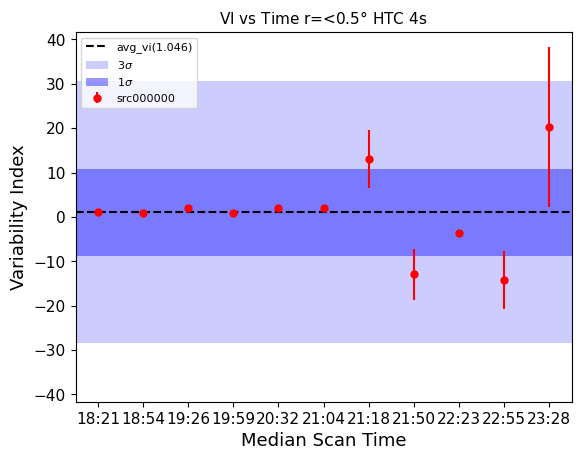

src000005


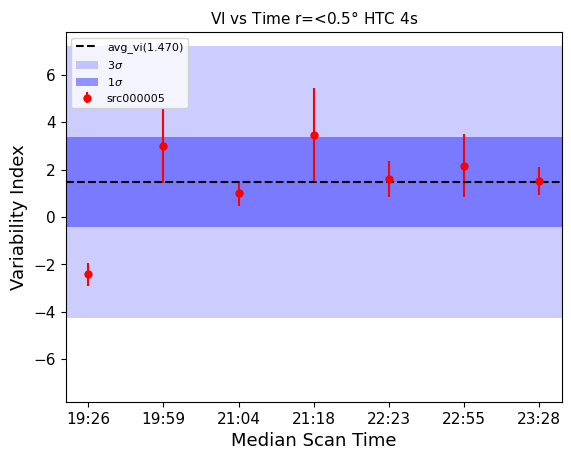

src000011


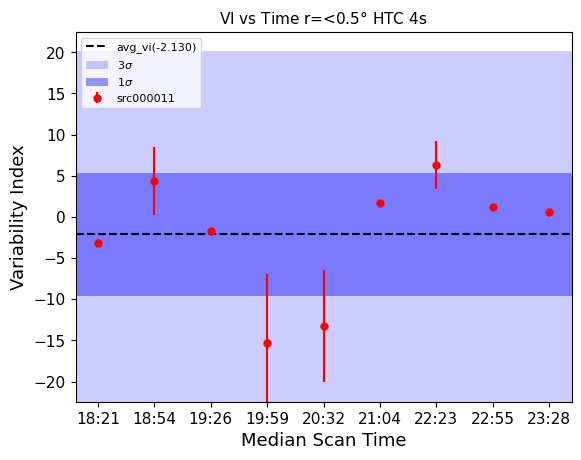

src000013


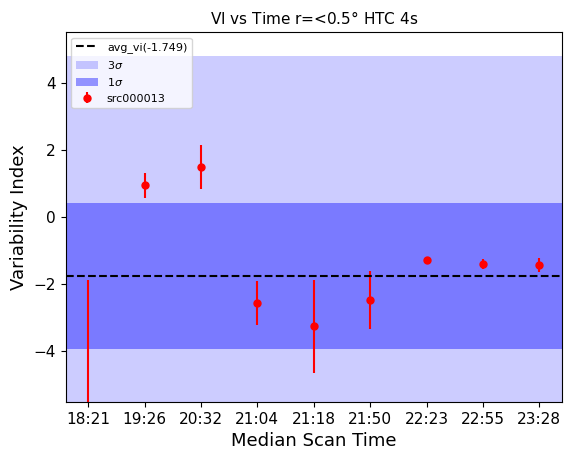

src000015


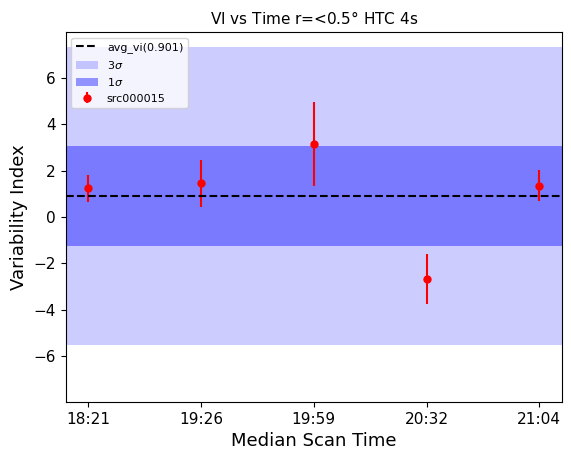

src000018


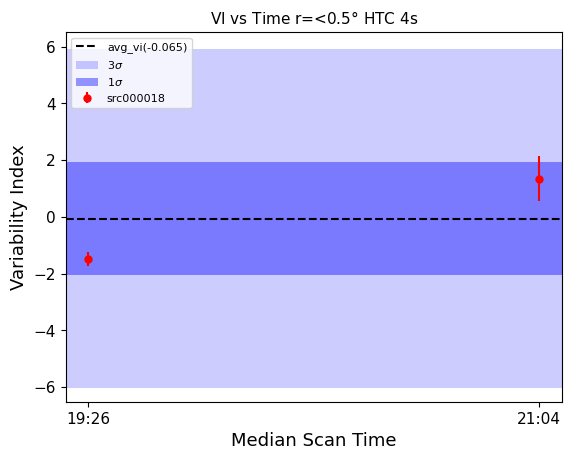

src000024


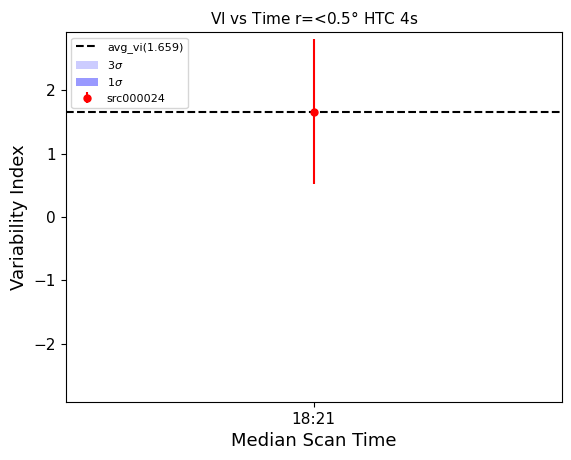

src000027


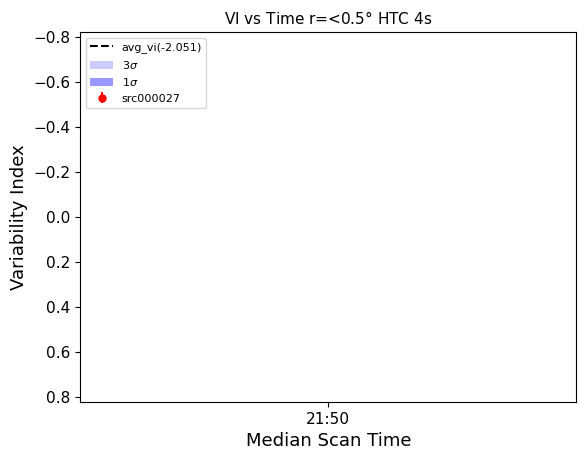

In [22]:
# Plotting VI against median scan time for each source
avg_vis = []

for i, df in enumerate(stats_5_filtered):
    # Extract source name from the file list
    source_name = ecsv_file_list[i].split("/")[-1].split("-L")[0]
    print(source_name)
    
    avg_vi= df['Variability_Index'].mean(skipna = True)
    std_vi = df['Variability_Index'].std(skipna = True)
    
    
    plt.errorbar(df['Median_Scan_Time'], df['Variability_Index'], yerr=df['VI_error'], fmt='o', color ='red', markersize=5, label=source_name)
    # Plotting average VI line
    plt.axhline(y=avg_vi, color='black', linestyle='--',  label=f'avg_vi({avg_vi:.3f})')

    # Plotting shaded regions for standard deviation
    plt.axhspan(avg_vi - 3*std_vi, avg_vi + 3*std_vi, color='blue', alpha=0.2, lw=0, label='3$\sigma$')
    plt.axhspan(avg_vi - std_vi, avg_vi + std_vi, color='blue', alpha=0.4, lw=0, label='1$\sigma$')

    # Set axis limits
    xmin, xmax, ymin, ymax = plt.axis()
    plt.ylim(-ymax, ymax)
    plt.xlabel('Median Scan Time')
    plt.ylabel('Variability Index')
    plt.title( 'VI vs Time r=<0.5$\degree$ HTC 4s')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=4, fancybox=True, shadow=True)
    plt.legend(loc='upper left', prop={'size': 8})
    plt.savefig(f'{source_name}avg_vi_4s.png', 
                    bbox_inches="tight")
    plt.show()
    avg_vis.append(avg_vi)
    
#     break


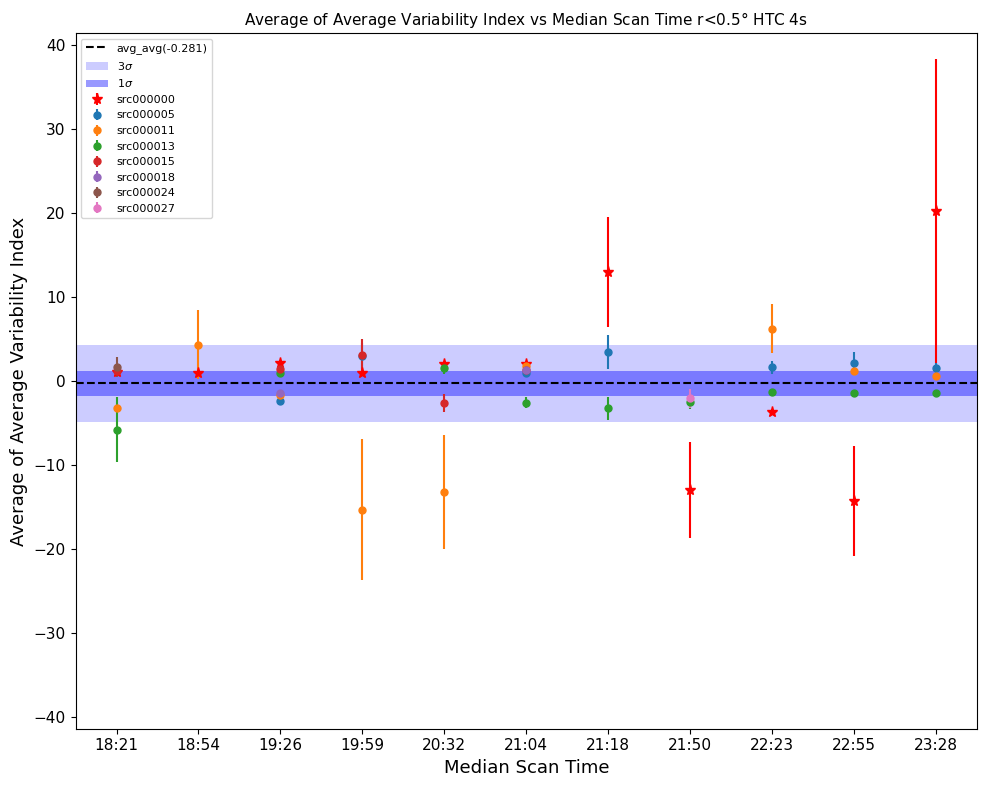

In [23]:
avg_avg_vi = np.nanmean(avg_vis[1:])  #Excluding the first value - phase calibrator avg vi
stddev_avg_vis = np.nanstd(avg_vis)

plt.figure(figsize=(10, 8))

# Plotting VI against median scan time for each source
for i, df in enumerate(stats_5_filtered):
    # Extract source name from the file list
    source_name = ecsv_file_list[i].split("/")[-1].split('-L')[0]
    phase_calibrator_name = "src000000" 
    
    if source_name == phase_calibrator_name:
        # Plot phase calibrator with a specific marker and color
        plt.errorbar(df['Median_Scan_Time'], df['Variability_Index'], yerr=df['VI_error'], fmt='*', color='red', markersize=8, label=source_name)
    else:
        # Plot other sources with a unique color
        plt.errorbar(df['Median_Scan_Time'], df['Variability_Index'], yerr=df['VI_error'], fmt='o', markersize=5, label=source_name)

# Plotting overall average VI line
plt.axhline(y=avg_avg_vi, color='black', linestyle='--', label=f'avg_avg({avg_avg_vi:.3f})')

# Plotting shaded regions for standard deviation
plt.axhspan(avg_avg_vi - 3*stddev_avg_vis, avg_avg_vi + 3*stddev_avg_vis, color='blue', alpha=0.2, lw=0, label='3$\sigma$')
plt.axhspan(avg_avg_vi - 1*stddev_avg_vis, avg_avg_vi + 1*stddev_avg_vis, color='blue', alpha=0.4, lw=0, label='1$\sigma$ ')

# Set axis limits
xmin, xmax, ymin, ymax = plt.axis()
plt.ylim(-ymax, ymax)

# Customize plot
plt.xlabel('Median Scan Time')
plt.ylabel('Average of Average Variability Index')
plt.title('Average of Average Variability Index vs Median Scan Time r<0.5$\degree$ HTC 4s')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=6, fancybox=True, shadow=True)
plt.legend(loc='upper left', prop={'size': 8})
# plt.grid(True)
plt.tight_layout()
plt.savefig('Average_of_Average_Variability_Index.png', bbox_inches="tight")

# Show the plot
plt.show()


In [24]:
# all_vi

# Comparison of the Phase Calibrator to other surces within 0.5deg

In [25]:
stats_5_filtered #This is a list of data frames - 
                #each data frame is a source and the coressponding per scan statistics after filtering.

[    Variability_Index   VI_error Median_Scan_Time           MJD         MI  \
 0            1.045611   0.109031            18:21  59852.764761   0.488978   
 1            0.975866   0.075434            18:54  59852.787503   0.502423   
 2            2.113418   0.245994            19:26  59852.810385   1.228628   
 3            0.969470   0.070249            19:59  59852.833174   0.585908   
 4            1.989554   0.196787            20:32  59852.855824   1.273165   
 5            2.070057   0.221604            21:04  59852.878429   2.142722   
 6           12.980613   6.543907            21:18  59852.887766   4.577966   
 7          -12.954853   5.728575            21:50  59852.910324  10.650519   
 8           -3.634125   0.316784            22:23  59852.932928 -18.171882   
 9          -14.283672   6.537340            22:55  59852.955486  -2.976101   
 10          20.231961  18.076171            23:28  59852.978044  -3.086988   
 
     Uncertainty  
 0      0.104275  
 1      0.07

In [26]:
stats_within5[0].iloc[0]['Variability_Index']

1.0456108160587234

In [27]:
stats_within5 #This is a list of data frames - 
            #each data frame is a source and the coressponding per scan statistics.

[    Variability_Index   VI_error Median_Scan_Time           MJD         MI  \
 0            1.045611   0.109031            18:21  59852.764761   0.488978   
 1            0.975866   0.075434            18:54  59852.787503   0.502423   
 2            2.113418   0.245994            19:26  59852.810385   1.228628   
 3            0.969470   0.070249            19:59  59852.833174   0.585908   
 4            1.989554   0.196787            20:32  59852.855824   1.273165   
 5            2.070057   0.221604            21:04  59852.878429   2.142722   
 6           12.980613   6.543907            21:18  59852.887766   4.577966   
 7          -12.954853   5.728575            21:50  59852.910324  10.650519   
 8           -3.634125   0.316784            22:23  59852.932928 -18.171882   
 9          -14.283672   6.537340            22:55  59852.955486  -2.976101   
 10          20.231961  18.076171            23:28  59852.978044  -3.086988   
 
     Uncertainty  
 0      0.104275  
 1      0.07

In [28]:
np.array(stats_within5).shape

(8, 11, 6)

In [29]:
np.array(stats_within5)[:,7,:]

array([[-12.954853254254719, 5.728574651397298, '21:50',
        59852.91032394674, 10.650518958978692, 0.4421952560146431],
       [9.926794835465099, 15.163253403419896, '21:50',
        59852.91032394674, 1.6389770896924232, 1.5275074840115253],
       [-55.76641261966445, 200.78916972849555, '21:50',
        59852.91032394674, -4.480081509466757, 3.6005394698401836],
       [-2.4677068090713745, 0.8582075143218084, '21:50',
        59852.91032394674, -1.472208266161004, 0.34777531559543795],
       [6.48393935231655, 18.73746158268628, '21:50', 59852.91032394674,
        2.7178138503164813, 2.8898267803803335],
       [-5.968213701563325, 10.566766374473069, '21:50',
        59852.91032394674, -1.5246015642777493, 1.7705073750467732],
       [-14.152937661329627, 102.3926305358118, '21:50',
        59852.91032394674, 145.61418248996745, 7.234726315200367],
       [-2.050759786311874, 1.118724424810463, '21:50',
        59852.91032394674, -1.7617936186990228, 0.5455170480119462]],
 

In [30]:
# We filter uncertain values(vi_error/vi >1) and negative vi then take the VI of each scan left 
#and calculate the mean and stddev per scan to compare to the phase cal. This is looped over the 11 scans.
avg_vi_per_scan = []
stddev_vi_per_scan = []
for rownumber in range (len(stats_within5[0])): #rownumber = 0
    vi_data_per_scan = []
    for i in np.arange(1,len(stats_within5)):
        #vi_data_per_scan.append(stats_within5[i].iloc[rownumber]['Variability_Index'])
        df_data = stats_within5[i].iloc[rownumber]
        if abs(df_data.VI_error/df_data.Variability_Index) <1 :# and df_data.Variability_Index>0: 
            vi_data_per_scan.append(df_data.Variability_Index)
            #print(rownumber)
        else:
            print('data flagged', i, rownumber)

    #append the per scan VI values into a list and calculate mean and stddev        
    avg_vi_per_scan.append(np.nanmean(vi_data_per_scan))
    stddev_vi_per_scan.append(np.nanstd(vi_data_per_scan))
    #print(vi_data_per_scan, len(vi_data_per_scan))
# print(avg_vi_per_scan)
# print(stddev_vi_per_scan)

data flagged 1 0
data flagged 5 0
data flagged 7 0
data flagged 1 1
data flagged 3 1
data flagged 4 1
data flagged 5 1
data flagged 6 1
data flagged 7 1
data flagged 6 2
data flagged 7 2
data flagged 3 3
data flagged 5 3
data flagged 6 3
data flagged 7 3
data flagged 1 4
data flagged 5 4
data flagged 6 4
data flagged 7 4
data flagged 6 5
data flagged 7 5
data flagged 2 6
data flagged 4 6
data flagged 5 6
data flagged 6 6
data flagged 7 6
data flagged 1 7
data flagged 2 7
data flagged 4 7
data flagged 5 7
data flagged 6 7
data flagged 4 8
data flagged 5 8
data flagged 6 8
data flagged 7 8
data flagged 4 9
data flagged 5 9
data flagged 6 9
data flagged 7 9
data flagged 4 10
data flagged 5 10
data flagged 6 10
data flagged 7 10


In [31]:
avg_vi_per_scan

[-1.5200059497448082,
 4.347329801783622,
 -0.6370453687147404,
 -3.0582616353682064,
 -4.798354935511745,
 0.5754227289052499,
 0.09490928510778729,
 -2.2592332976916243,
 2.197474906980754,
 0.6692728880268651,
 0.235050442400506]

In [32]:
stddev_vi_per_scan

[3.108152266507533,
 0.0,
 1.535731337933936,
 8.65780429692548,
 6.192018714166077,
 1.585021436589828,
 3.3547953751528823,
 0.20847351137975023,
 3.101451651930016,
 1.5053080958654204,
 1.2350801326685086]

In [33]:
#Create a new dataframe with the average VI, min and max VI per scan.
VI_df = pd.DataFrame(list(zip(np.array(avg_vi_per_scan), 
                               np.array(avg_vi_per_scan) - np.array(stddev_vi_per_scan), 
                               np.array(avg_vi_per_scan) + np.array(stddev_vi_per_scan),
                               np.array(avg_vi_per_scan) - 3*np.array(stddev_vi_per_scan), 
                               np.array(avg_vi_per_scan) + 3*np.array(stddev_vi_per_scan),
                             )
                         ),
               columns =['Average_per_scan', 'Min_stddev_per_scan','Max_stddev_per_scan',
                         'Min_3stddev_per_scan','Max_3stddev_per_scan' ])
VI_df['Median_Scan_Time'] = stats_within5[0]['Median_Scan_Time']
VI_df

,Average_per_scan,Min_stddev_per_scan,Max_stddev_per_scan,Min_3stddev_per_scan,Max_3stddev_per_scan,Median_Scan_Time
0,-1.520006,-4.628158,1.588146,-10.844463,7.804451,18:21
1,4.347330,4.347330,4.347330,4.347330,4.347330,18:54
2,-0.637045,-2.172777,0.898686,-5.244239,3.970149,19:26
3,-3.058262,-11.716066,5.599543,-29.031675,22.915151,19:59
4,-4.798355,-10.990374,1.393664,-23.374411,13.777701,20:32
5,0.575423,-1.009599,2.160444,-4.179642,5.330487,21:04
6,0.094909,-3.259886,3.449705,-9.969477,10.159295,21:18
7,-2.259233,-2.467707,-2.050760,-2.884654,-1.633813,21:50
8,2.197475,-0.903977,5.298927,-7.106880,11.501830,22:23
9,0.669273,-0.836035,2.174581,-3.846651,5.185197,22:55


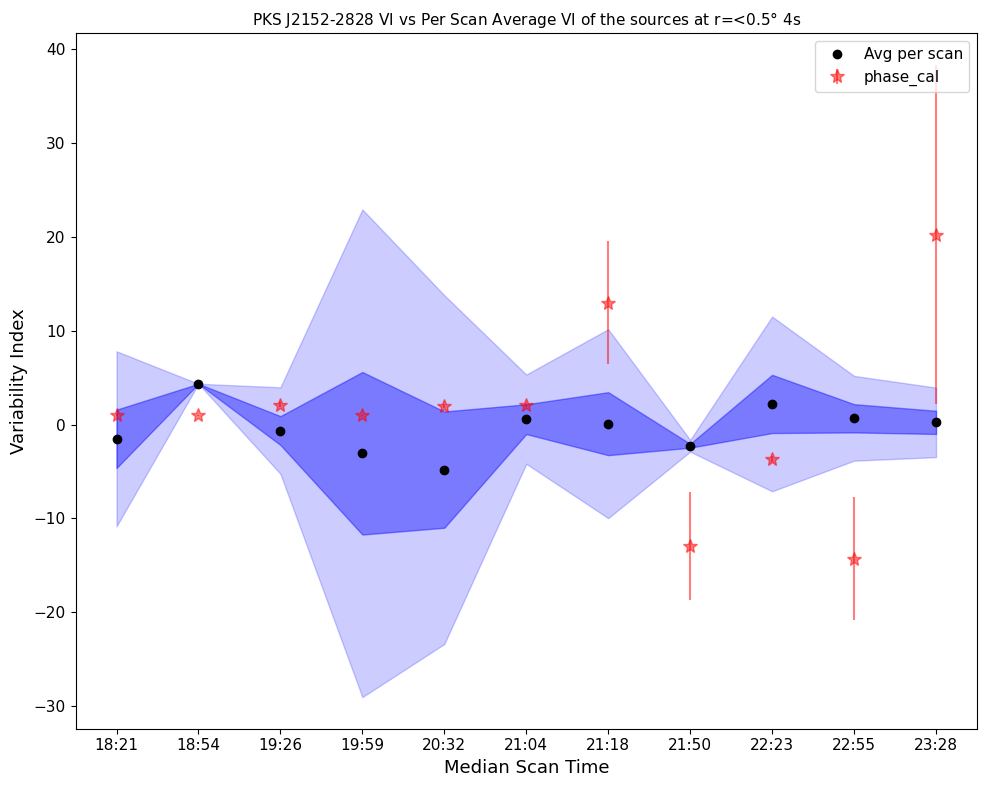

In [34]:
# plotting the variability index per scan vs median scan time of the phase calibrator 
#as compared to the Average VI per scan for all other sources within 0.5deg 
#and the minimum and maximum standard deviation of VI per scan for all other sources within 0.5deg.

plt.figure(figsize = (10, 8))

ax = plt.plot(VI_df.Median_Scan_Time, VI_df.Average_per_scan, 'o', alpha = 1, color = 'black', label = 'Avg per scan')

plt.fill_between(VI_df.Median_Scan_Time, VI_df.Min_stddev_per_scan, VI_df.Max_stddev_per_scan,
                 alpha = 0.4, color = 'blue')
plt.fill_between(VI_df.Median_Scan_Time, VI_df.Min_3stddev_per_scan, VI_df.Max_3stddev_per_scan,
                 alpha = 0.2, color = 'blue')

plt.errorbar(stats_5_filtered[0].Median_Scan_Time, stats_5_filtered[0].Variability_Index, fmt = '',linestyle = ' ',
             marker = '*',color = 'red', markersize = 10,  alpha = 0.5, yerr = stats_5_filtered[0].VI_error, label = 'phase_cal')

plt.legend()
plt.xlabel('Median Scan Time')
plt.ylabel('Variability Index')
plt.title('PKS J2152-2828 VI vs Per Scan Average VI of the sources at r=<0.5$\degree$ 4s')
# plt.grid(True)  # Add grid
plt.tight_layout()  # Improve spacing


plt.savefig(f'PKS J2152-2828 VI vs VI of the sources at r=<0.5 4s.png', 
                    bbox_inches="tight")

# Show the plot (optional)
plt.show()

# MI

In [35]:
avg_mi_per_scan = []
stddev_mi_per_scan = []
for rownumber in range (len(stats_within5[0])): #rownumber = 0
    mi_data_per_scan = []
    for i in np.arange(1,len(stats_within5)):
        #vi_data_per_scan.append(stats_within5[i].iloc[rownumber]['Variability_Index'])
        df_data = stats_within5[i].iloc[rownumber]
        if abs(df_data.VI_error/df_data.Variability_Index) <1: #and df_data.Variability_Index>0: 
            mi_data_per_scan.append(df_data.MI)
            #print(rownumber)
       # else:
           # print('data flagged', i, rownumber)
        
    #append the per scan VI values into a list and calculate mean and stddev        
    avg_mi_per_scan.append(np.nanmean(mi_data_per_scan))
    stddev_mi_per_scan.append(np.nanstd(mi_data_per_scan))
    #print(vi_data_per_scan, len(vi_data_per_scan))
print(avg_mi_per_scan)
print(stddev_mi_per_scan)

[-271.8302670448307, 1.8023395764441057, -0.37810387117468774, 2.7482120263552474, -0.5737731768318527, 0.4541245866576622, -0.145519103585681, -1.6170009424300136, 2.16857311038727, 0.25607180978102123, 0.10172051407186167]
[400.77513841951014, 0.0, 0.9896478484413048, 1.246008194308329, 0.9092843371611973, 2.3536988224740902, 1.6261599865482221, 0.14479267626900938, 3.1902873932611415, 0.8502308769948321, 0.7000059346866888]


In [36]:
#Create a new dataframe with the average MI, min and max MI per scan.
MI_df = pd.DataFrame(list(zip(
                    np.array(avg_mi_per_scan),
                     np.array(avg_mi_per_scan) - np.array(stddev_mi_per_scan),
                     np.array(avg_mi_per_scan) + np.array(stddev_mi_per_scan),
                     np.array(avg_mi_per_scan) - 3*np.array(stddev_mi_per_scan),
                     np.array(avg_mi_per_scan) + 3*np.array(stddev_mi_per_scan))),
                     
               columns =['Average_per_scan',
                         'Min_stddev_per_scan',
                         'Max_stddev_per_scan', 
                         'Min_3stddev_per_scan',
                         'Max_3stddev_per_scan' ]
                         )
MI_df['Median_Scan_Time'] = stats_within5[0]['Median_Scan_Time']
MI_df

,Average_per_scan,Min_stddev_per_scan,Max_stddev_per_scan,Min_3stddev_per_scan,Max_3stddev_per_scan,Median_Scan_Time
0,-271.830267,-672.605405,128.944871,-1474.155682,930.495148,18:21
1,1.802340,1.802340,1.802340,1.802340,1.802340,18:54
2,-0.378104,-1.367752,0.611544,-3.347047,2.590840,19:26
3,2.748212,1.502204,3.994220,-0.989813,6.486237,19:59
4,-0.573773,-1.483058,0.335511,-3.301626,2.154080,20:32
5,0.454125,-1.899574,2.807823,-6.606972,7.515221,21:04
6,-0.145519,-1.771679,1.480641,-5.023999,4.732961,21:18
7,-1.617001,-1.761794,-1.472208,-2.051379,-1.182623,21:50
8,2.168573,-1.021714,5.358861,-7.402289,11.739435,22:23
9,0.256072,-0.594159,1.106303,-2.294621,2.806764,22:55


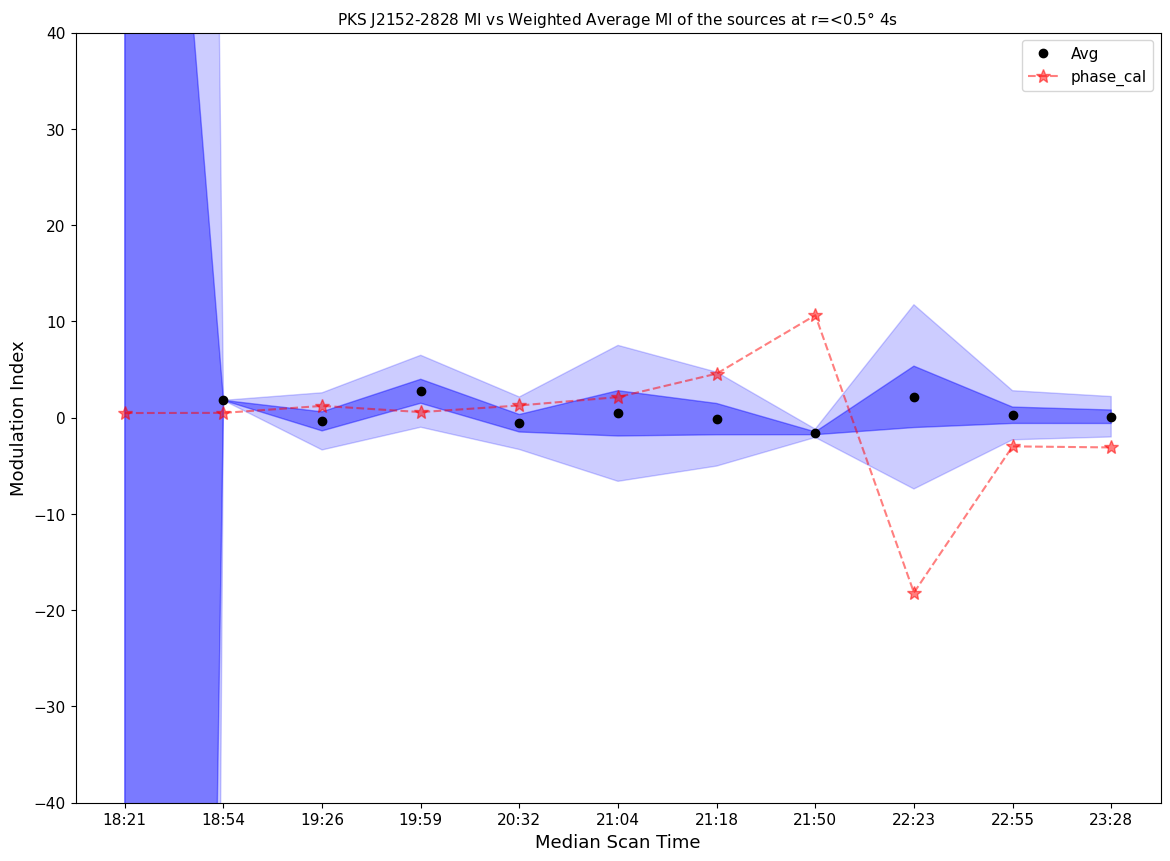

In [37]:
plt.figure(figsize = (14, 10))

ax = plt.plot(MI_df.Median_Scan_Time, MI_df.Average_per_scan, 'o', alpha = 1, color = 'black', label = 'Avg')

plt.fill_between(MI_df.Median_Scan_Time, MI_df.Min_stddev_per_scan, MI_df.Max_stddev_per_scan, 
                 alpha = 0.4, color = 'blue')

plt.fill_between(MI_df.Median_Scan_Time, MI_df.Min_3stddev_per_scan, MI_df.Max_3stddev_per_scan, 
                 alpha = 0.2, color = 'blue')

plt.plot(stats_5_filtered[0].Median_Scan_Time, stats_5_filtered[0].MI, marker = '*',linestyle = '--',
          markersize = 10, color='red',  alpha = 0.5, label = 'phase_cal')
plt.legend()
plt.ylim(-40, 40)
plt.xlabel('Median Scan Time')
plt.ylabel('Modulation Index')
plt.title('PKS J2152-2828 MI vs Weighted Average MI of the sources at r=<0.5$\degree$ 4s')
plt.savefig(f'PKS J2152-2828 MI vs MI of the sources at r=<0.5 4s.png', 
                    bbox_inches="tight")